Key Question 1: How does sleep duration affect overall health and well-being?
Datasets:
Sleep Health and Lifestyle Dataset: Sleep duration, stress levels, overall health indicators (BMI, blood pressure, etc.).
Sleep Efficiency Dataset: Sleep duration, sleep efficiency, health metrics (REM %, deep sleep, etc.).

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

sleep_health_df = pd.read_csv("../Data/Raw/Sleep_health_and_lifestyle_dataset.csv")

In [86]:
sleep_health_df

Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                   6                       60             8       Normal   
2                   6                       60             8       Normal   
3                   4                       30             8        Obese   
4                   4                       30             8        Obese   
..                ...                      ...           ...          ...   
369                 9                       75             3   Overweight   
370                 9                       75             3   Overweight   
371                 9                       75             3   Overweight   
372                 9                       75             3   Overweight   
373                 9                       75             3   Overweight   

    Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0           126/83          77         4200            NaN  
1           125/80          75        10000            NaN  
2           125/80          75        10000            NaN  
3           140/90          85         3000    Sleep Apnea  
4           140/90          85         3000    Sleep Apnea  
..             ...         ...          ...            ...  
369         140/95          68         7000    Sleep Apnea  
370         140/95          68         7000    Sleep Apnea  
371         140/95          68         7000    Sleep Apnea  
372         140/95          68         7000    Sleep Apnea  
373         140/95          68         7000    Sleep Apnea  

[374 rows x 13 columns]

In [87]:
sleep_health_df.shape

(374, 13)

In [88]:
sleep_health_df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [89]:
sleep_health_df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [90]:
# Let's fill the missing values of column "Sleep Disorder"
sleep_health_df.fillna("None", inplace = True)

In [91]:
sleep_health_df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [92]:
#Check the number of unique value from all of the object datatype
sleep_health_df.select_dtypes(include='object').nunique()

Gender             2
Occupation        11
BMI Category       4
Blood Pressure    25
Sleep Disorder     3
dtype: int64

In [93]:
#check data type for each col
sleep_health_df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [94]:
sleep_health_df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

In [95]:
# Drop identifier column 'Person ID'
sleep_health_df.drop(columns='Person ID', inplace=True)
sleep_health_df.head()

Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0   Male   27     Software Engineer             6.1                 6   
1   Male   28                Doctor             6.2                 6   
2   Male   28                Doctor             6.2                 6   
3   Male   28  Sales Representative             5.9                 4   
4   Male   28  Sales Representative             5.9                 4   

   Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                       42             6   Overweight         126/83   
1                       60             8       Normal         125/80   
2                       60             8       Normal         125/80   
3                       30             8        Obese         140/90   
4                       30             8        Obese         140/90   

   Heart Rate  Daily Steps Sleep Disorder  
0          77         4200           None  
1          75        10000           None  
2          75        10000           None  
3          85         3000    Sleep Apnea  
4          85         3000    Sleep Apnea

In [96]:
# Split the 'Blood Pressure' column into two separate columns
sleep_health_df[['Blood Pressure 1', 'Blood Pressure 2']] = sleep_health_df['Blood Pressure'].str.split('/', expand=True).astype(int)
sleep_health_df.drop(columns='Blood Pressure', inplace=True)

sleep_health_df.head()

Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0   Male   27     Software Engineer             6.1                 6   
1   Male   28                Doctor             6.2                 6   
2   Male   28                Doctor             6.2                 6   
3   Male   28  Sales Representative             5.9                 4   
4   Male   28  Sales Representative             5.9                 4   

   Physical Activity Level  Stress Level BMI Category  Heart Rate  \
0                       42             6   Overweight          77   
1                       60             8       Normal          75   
2                       60             8       Normal          75   
3                       30             8        Obese          85   
4                       30             8        Obese          85   

   Daily Steps Sleep Disorder  Blood Pressure 1  Blood Pressure 2  
0         4200           None               126                83  
1        10000           None               125                80  
2        10000           None               125                80  
3         3000    Sleep Apnea               140                90  
4         3000    Sleep Apnea               140                90

In [97]:
sleep_health_df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [98]:
# Replace 'Normal Weight' with 'Normal' in 'BMI Category' column
sleep_health_df['BMI Category'] = sleep_health_df['BMI Category'].replace('Normal Weight', 'Normal')
sleep_health_df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [99]:
sleep_health_df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [121]:
sleep_health_df['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [100]:
sleep_health_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [101]:
sleep_health_df['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

/var/folders/s7/4sn2754148dcqgykzktgd2q40000gp/T/ipykernel_93067/3186855386.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/var/folders/s7/4sn2754148dcqgykzktgd2q40000gp/T/ipykernel_93067/3186855386.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
/var/folders/s7/4sn2754148dcqgykzktgd2q40000gp/T/ipykernel_93067/3186855386.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)


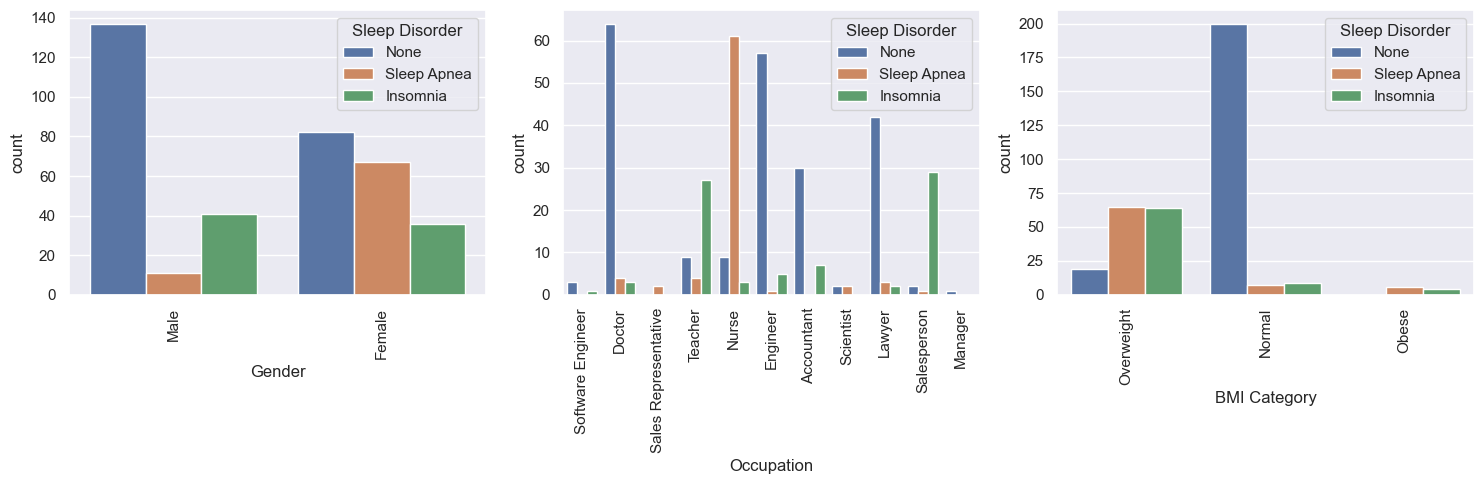

In [102]:
# list of categorical variables to plot
cat_vars = sleep_health_df[['Gender', 'Occupation', 'BMI Category']]

# create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Sleep Disorder', data=sleep_health_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

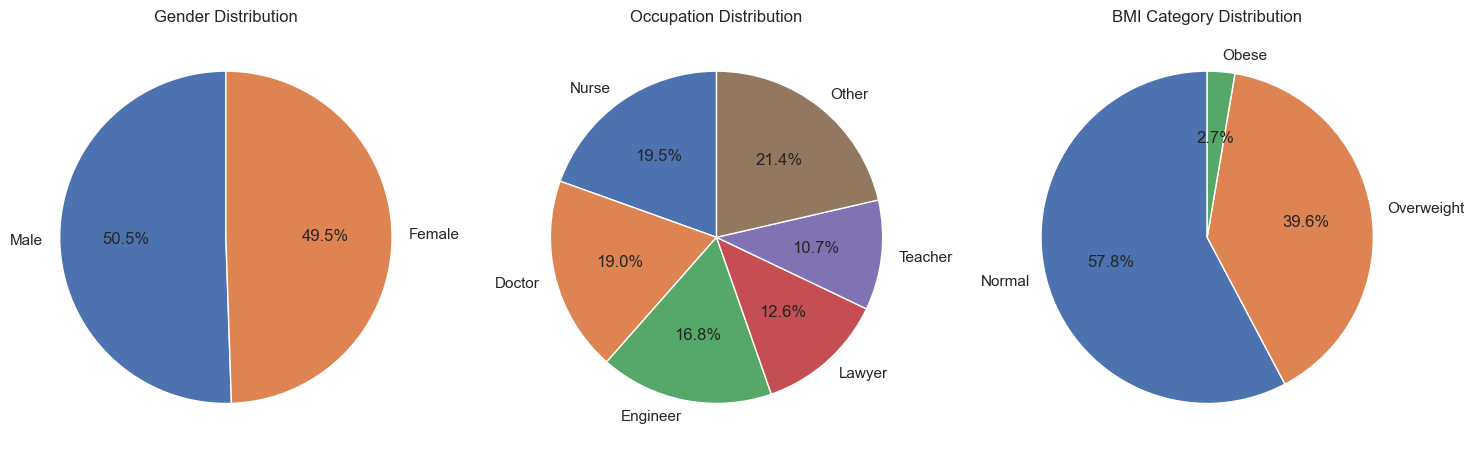

In [131]:
#Specify the maximum number of categories to show individually
max_categories = 5

cat_vars = ['Gender', 'Occupation', 'BMI Category']

# Create a figure and axes
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

# Create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # Count the number of occurrences for each category
        cat_counts = sleep_health_df[var].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
        
            cat_counts = pd.concat([cat_counts_top, cat_counts_other])

        # Create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # Set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

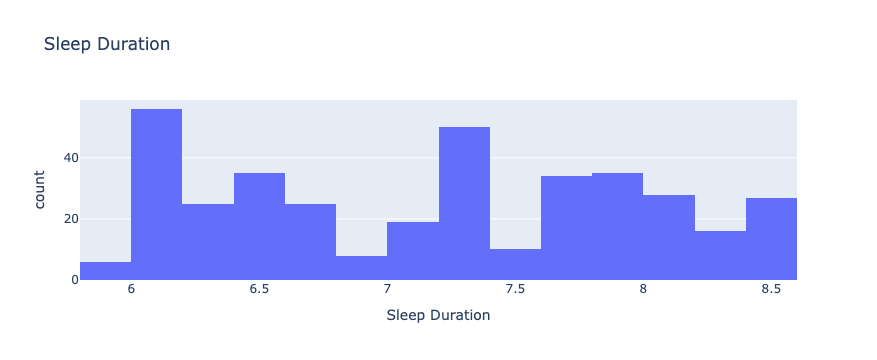

In [135]:
import plotly.express as px
fig = px.histogram(sleep_health_df, x = 'Sleep Duration', nbins = 20, title = 'Sleep Duration')
fig.show()

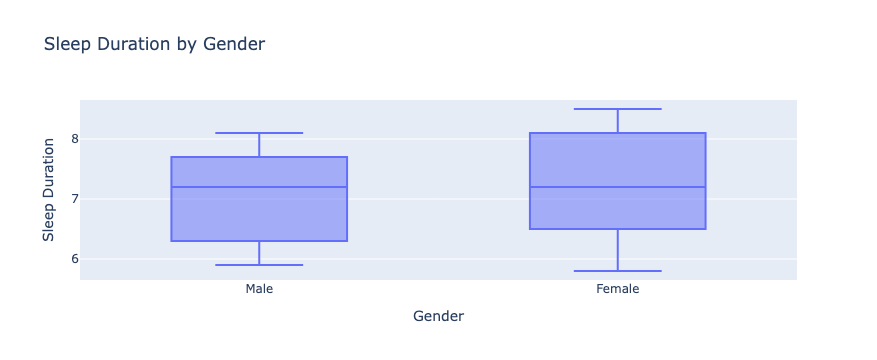

In [141]:
fig = px.box(sleep_health_df, y = "Sleep Duration", x = "Gender", title = "Sleep Duration by Gender")
fig.show()

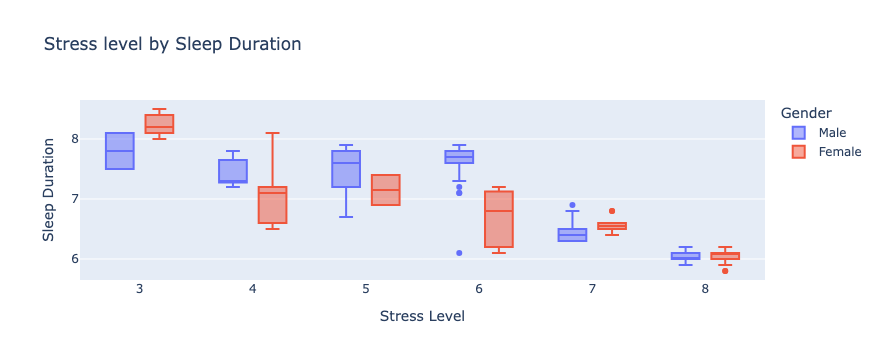

In [147]:
fig = px.box(sleep_health_df, x = "Stress Level", y = "Sleep Duration", color = "Gender", title = "Stress level by Sleep Duration")
fig.show()

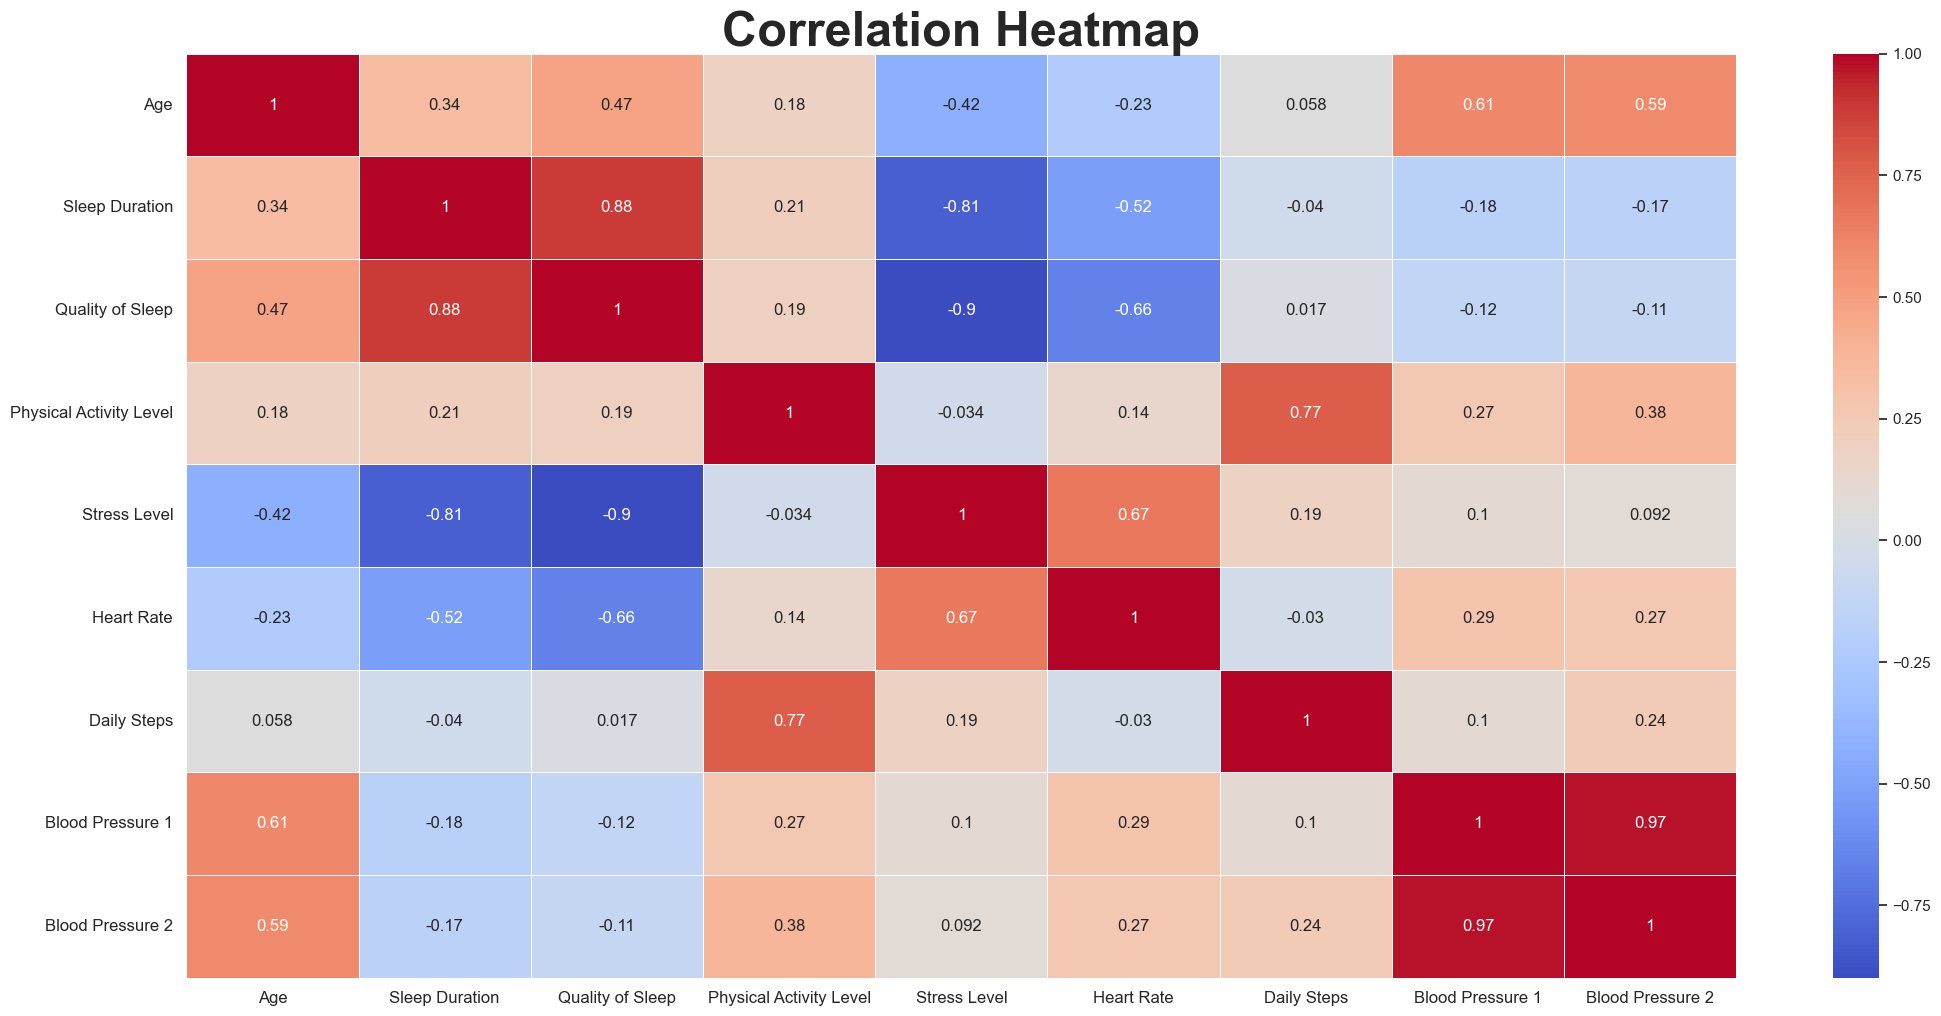

In [153]:
sns.set(rc = {"figure.figsize" : (25, 12)})
s = sleep_health_df.select_dtypes(include = "number").corr()
sns.heatmap(s, annot = True, linewidth = 0.5, cmap = "coolwarm")
plt.title("Correlation Heatmap", fontsize = 35, fontweight = "bold")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

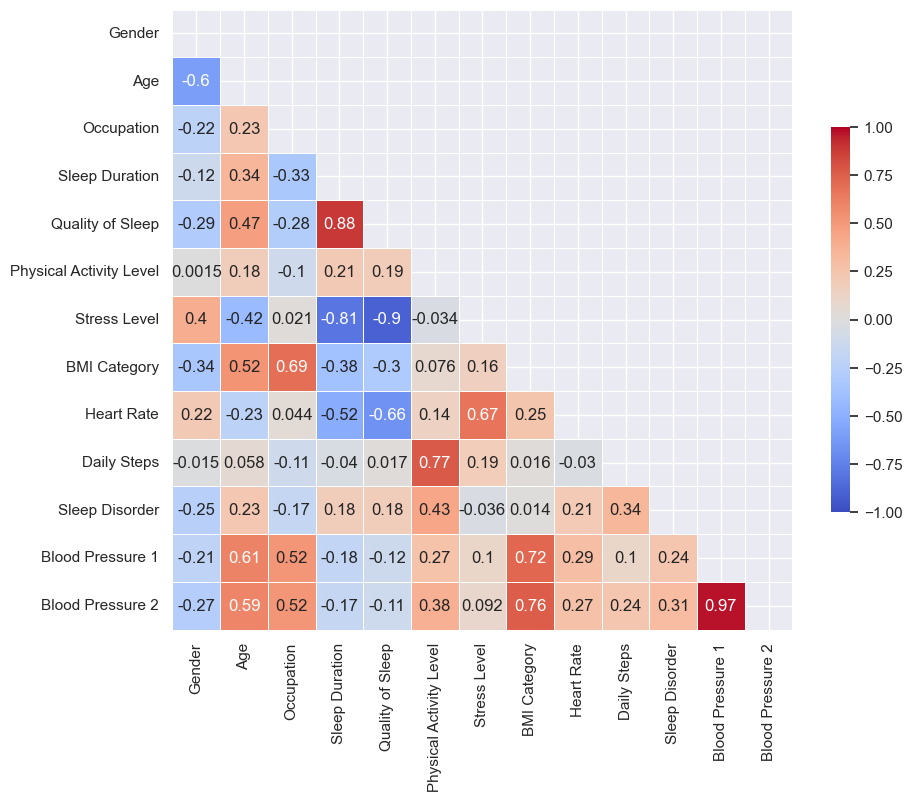

In [202]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix (without absolute value)
corr = sleep_health_df.select_dtypes(include="number").corr()

# Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Use a diverging color palette for the heatmap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}, annot=True, cmap=cmap)

# Show the plot
plt.show()

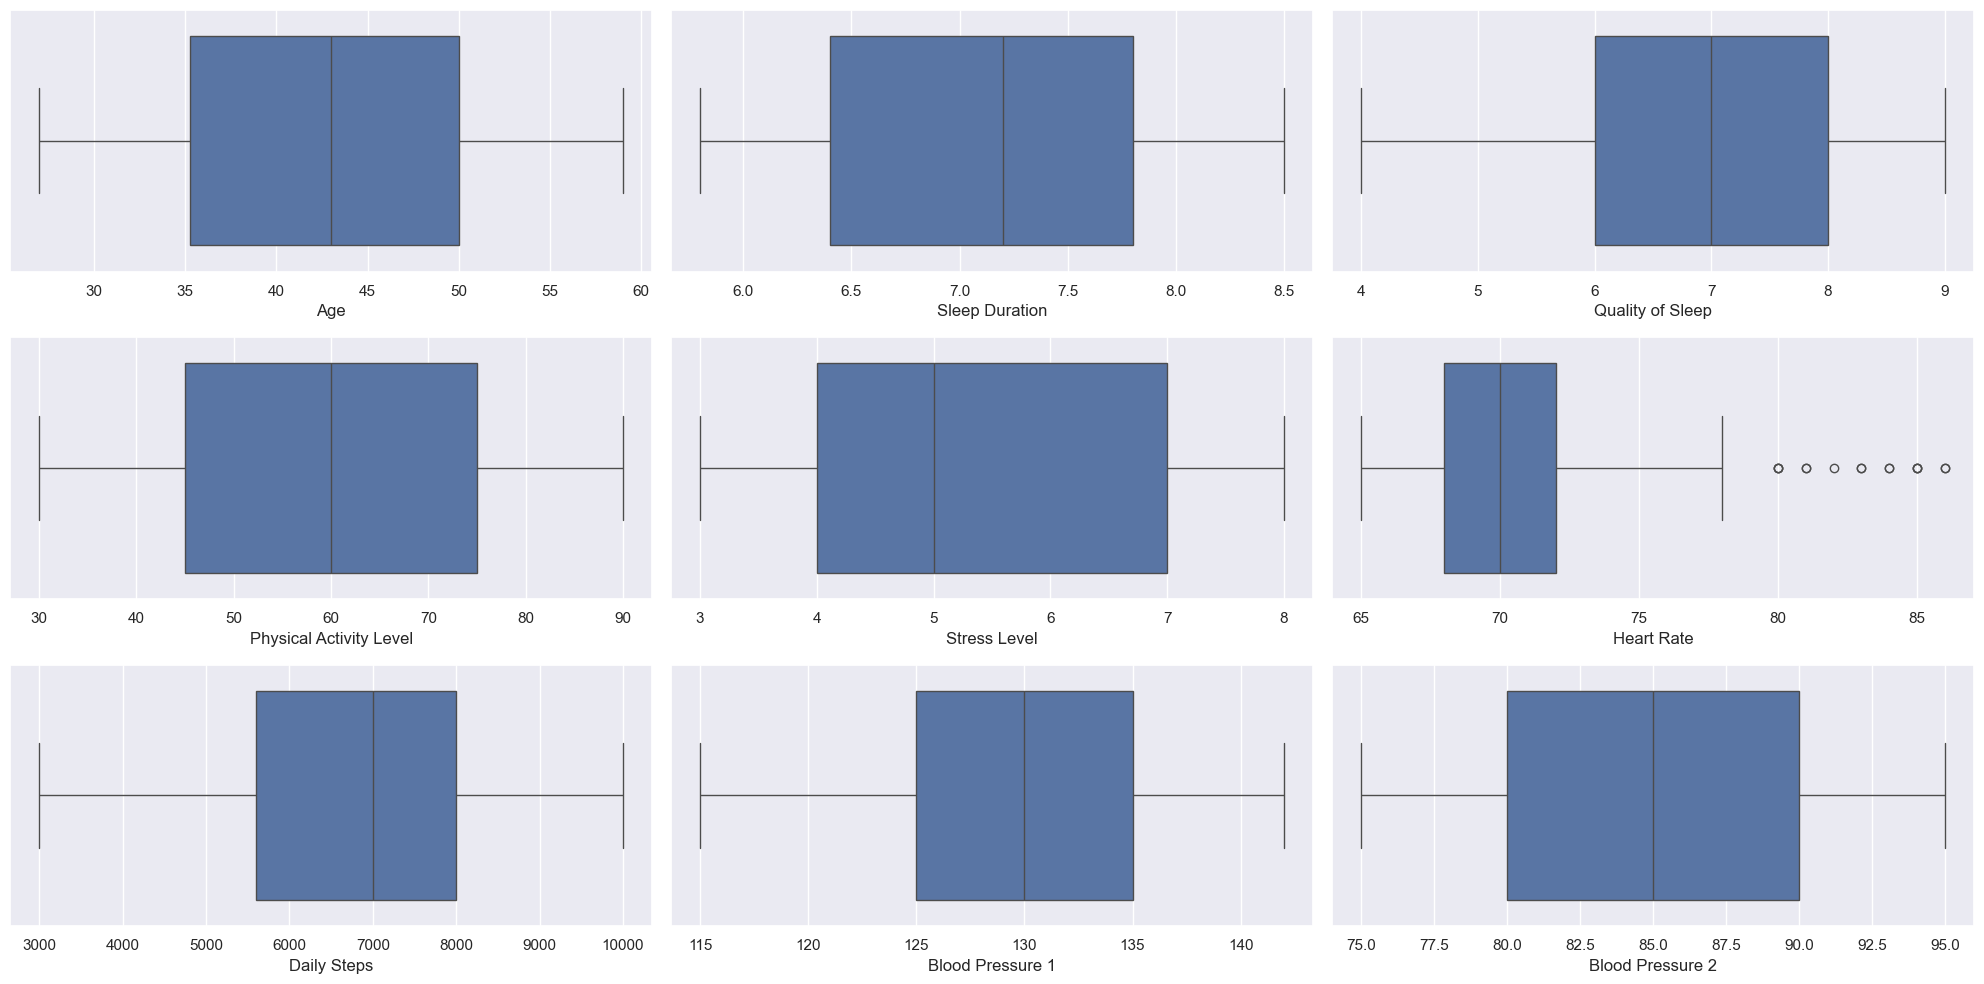

In [129]:
#check for outliers in numerical columns

num_vars = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
            'Stress Level','Heart Rate', 'Daily Steps', 'Blood Pressure 1', 'Blood Pressure 2']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=sleep_health_df, ax=axs[i])

fig.tight_layout()

plt.show()

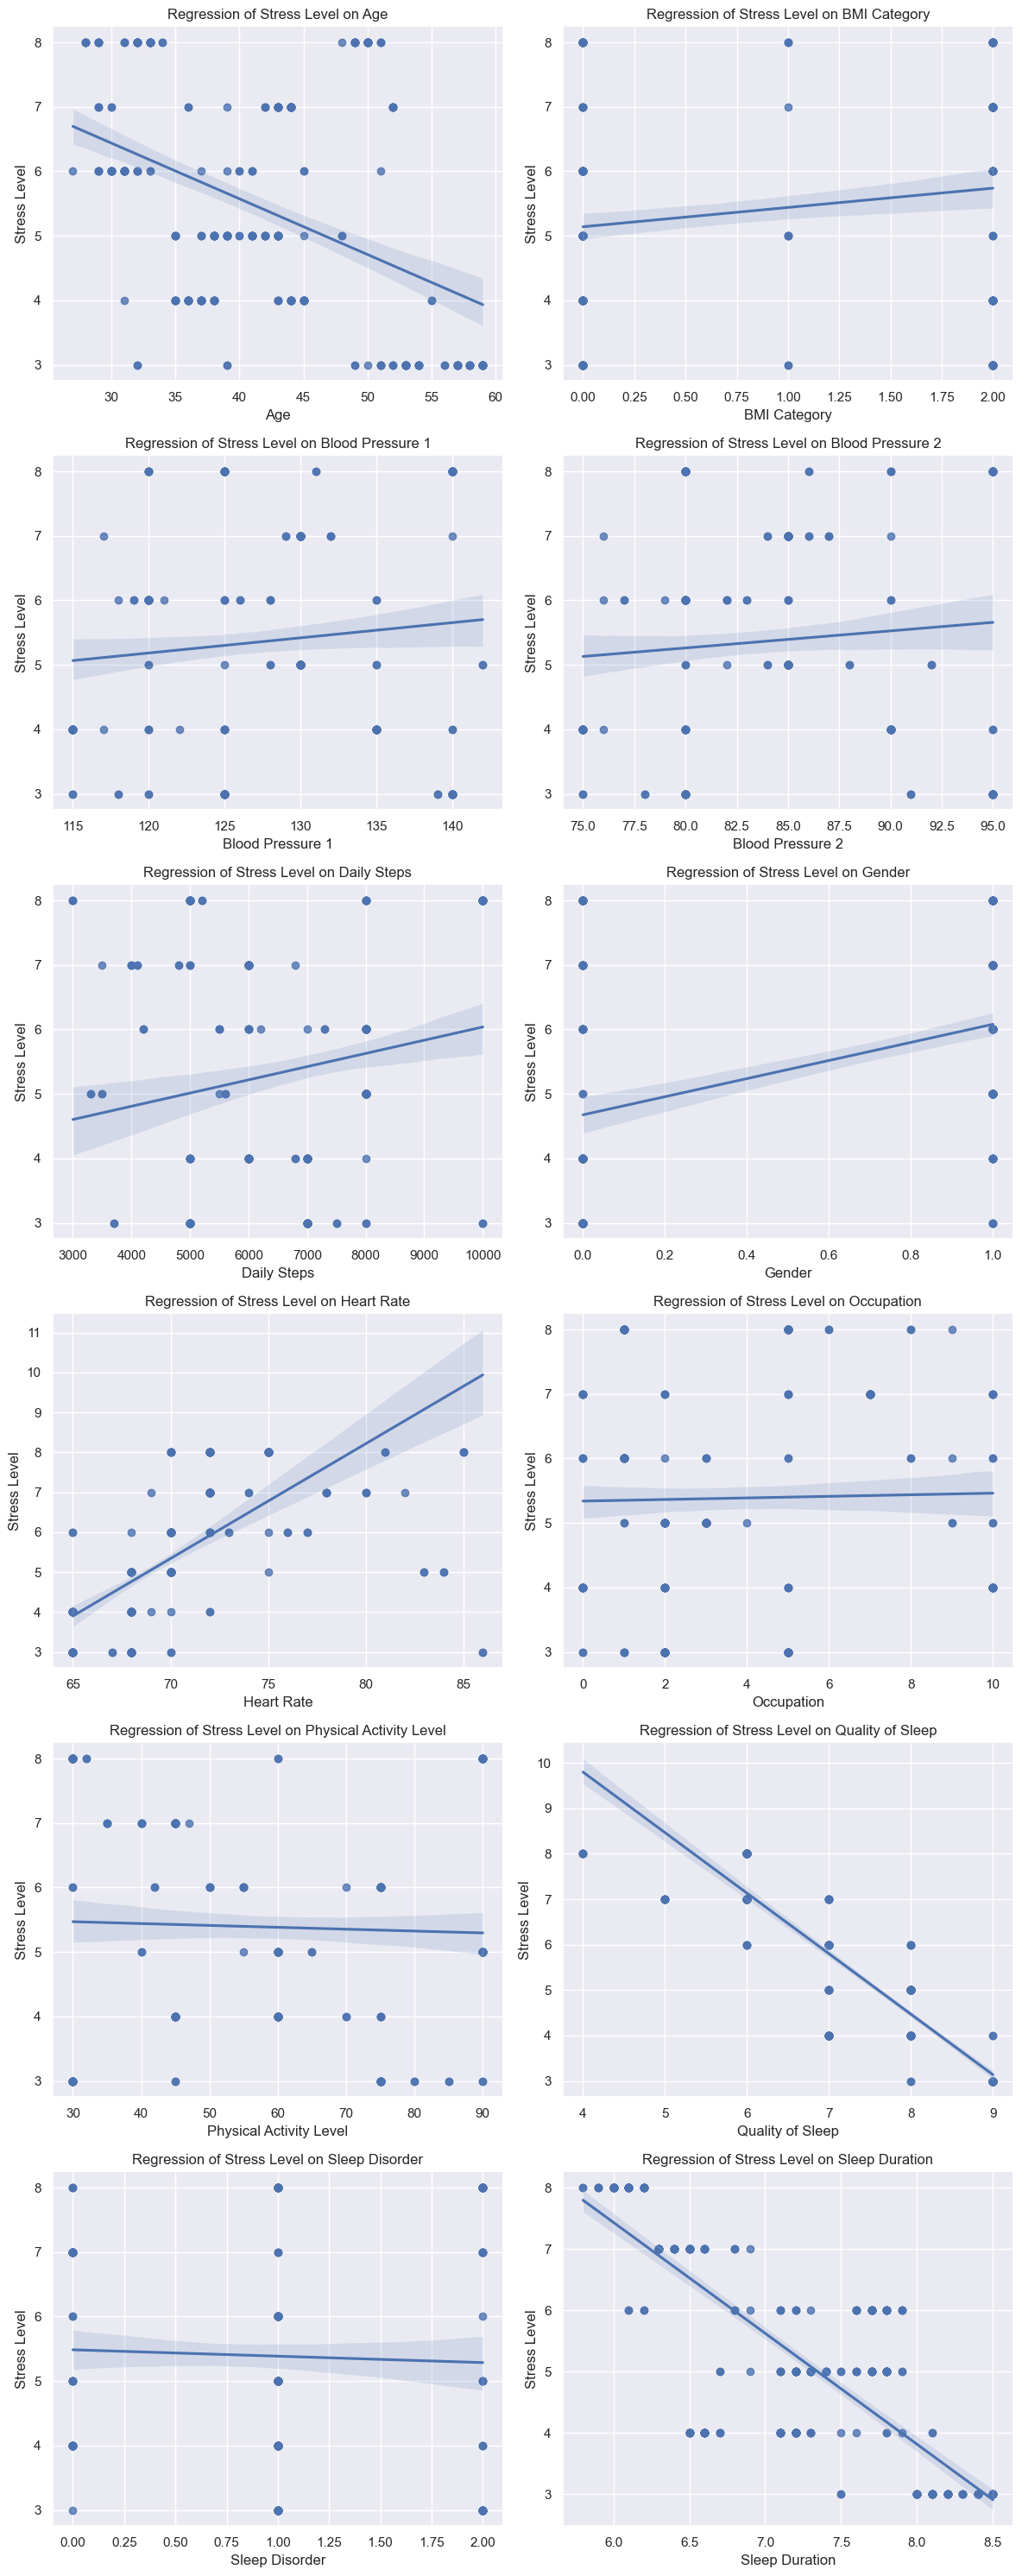

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get all column names except for 'Stress Level'
cols = sleep_health_df.columns.difference(['Stress Level'])

# Determine the number of columns and rows for the subplot
num_cols = len(cols)
num_rows = (num_cols + 1) // 2  # Two columns per row

# Set up the figure and axes
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through the columns and create a lmplot for each
for ax, col in zip(axes, cols):
    sns.regplot(x=col, y='Stress Level', data=sleep_health_df, ax=ax)
    ax.set_title(f'Regression of Stress Level on {col}')

# Hide any unused axes
for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()